In [111]:
import re
import pandas as pd
import os
import pickle
import seaborn as sns
import numpy as np
import sys
sys.path.append("/Users/jiahang/Documents/dagma/src/dagma/")
import utils
import matplotlib.pyplot as plt
from tqdm import tqdm

def load_data(n_nodes, seed, version_path):
    root_path="/Users/jiahang/Documents/dagma/src/dagma/simulated_data/"
    with open(os.path.join(root_path, f'{version_path}/W/W_{seed}_0.pkl'), 'rb') as f:
        W = pickle.load(f)
    with open(os.path.join(root_path, f'{version_path}/X/X_1.pkl'), 'rb') as f:
        X = pickle.load(f)
    W_est = W['W_est']
    W = W['W_est'][:, :n_nodes]
    Z = np.abs(W[:n_nodes]) - np.abs(W[n_nodes:])
    W_true = X['W_true']
    B_true = (W_true != 0)
    
    W_est_abs = np.abs(W_est)
    mask = utils.extract_dag_mask(W_est_abs, 0)
    W_est_1 = W_est.copy()
    W_est_1[~mask] = 0.
    
    return B_true, W_est, W_est_1

def draw_results_3(n_nodes, er, seed, version_path, data):
    if data is None:
        B_true, W_est, W_est_1 = load_data(n_nodes, seed, version_path)
    else:
        B_true, W_est, W_est_1 = data[seed-1][0], data[seed-1][1], data[seed-1][2]

    fig, axs = plt.subplots(3, 4, figsize=(18, 10))

    """W11 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[0][0], label='log|W21| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[0][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[0][1], label='log|W21| after DAG')

    """W12 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[0][2], label='log|W12| before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[0][2], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[0][3], label='log|W12| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[0][3], label='log|W22| after DAG')

    """W11 vs W12"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[1][0], label='log|W12| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[1][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[1][1], label='log|W12| after DAG')

    """W21 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[1][2], label='log|W21| before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[1][2], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[1][3], label='log|W21| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[1][3], label='log|W22| after DAG')

    """W11 vs W22"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[2][0], label='log|W11| null before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[2][0], label='log|W22| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, :n_nodes])+1e-8)[~B_true].flatten(), ax=axs[2][1], label='log|W11| null after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, n_nodes:])+1e-8).flatten(), ax=axs[2][1], label='log|W22| after DAG')

    """W12 vs W21"""
    sns.ecdfplot(x=np.log(np.abs(W_est[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[2][2], label='log|W12| before DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[2][2], label='log|W21| before DAG')

    sns.ecdfplot(x=np.log(np.abs(W_est_1[:n_nodes, n_nodes:])+1e-8).flatten(), ax=axs[2][3], label='log|W12| after DAG')
    sns.ecdfplot(x=np.log(np.abs(W_est_1[n_nodes:, :n_nodes])+1e-8).flatten(), ax=axs[2][3], label='log|W21| after DAG')

    for i in range(len(axs)):
        for j in range(len(axs[0])):
            axs[i][j].legend()

    n_edges = n_nodes * er
    fig.suptitle(f"{n_nodes} nodes | {n_edges} edges | seed {seed}")
    plt.tight_layout()
    # plt.legend()
    plt.show()

# 20 nodes, 80 edges

In [142]:
def get_data(seed, option, data_list):
    assert option in ['est', 'est_dag']
    if option == 'est':
        _opt = 0
    else:
        _opt = 1
    return data_list[seed-1][_opt]

def get_Z(data, n_nodes=20, left=11, right=21):
    data_dict = {
        11: data[:n_nodes, :n_nodes],
        12: data[:n_nodes, n_nodes:],
        21: data[n_nodes:, :n_nodes],
        22: data[n_nodes:, n_nodes:]
    }
    return np.abs(data_dict[left]) - np.abs(data_dict[right])

In [118]:
data_20_list = []
for i in range(1, 11):
    B_true, W_est, W_est_1 = load_data(20, i, 'v34/v20')
    data_20_list.append((W_est, W_est_1))


In [129]:
# seed 1, W_est
data = get_data(1, 'est', data_20_list)

In [132]:
Z = get_Z(data)

In [134]:
(Z[~B_true] > 0.).sum() / Z[~B_true].size

0.5375

In [135]:
(Z[~B_true] < 0.).sum() / Z[~B_true].size

0.4625

In [140]:
(Z[~B_true] > 1e-2).sum() / Z[~B_true].size

0.109375

In [141]:
(Z[~B_true] < -1e-2).sum() / Z[~B_true].size

0.075

<Axes: ylabel='Count'>

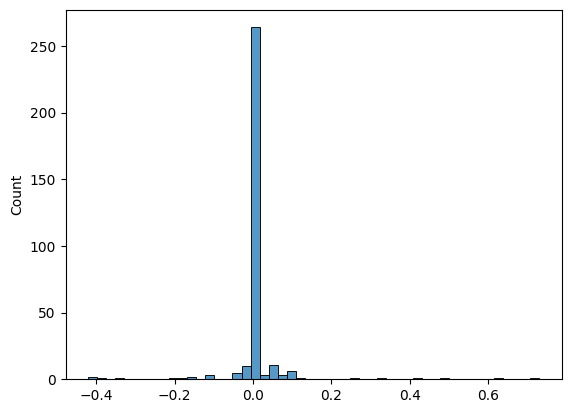

In [137]:
sns.histplot(Z[~B_true].flatten(), bins=50)

In [143]:
Z = get_Z(data, left=12, right=22)

In [148]:
(Z > 0.).sum() / Z.size

0.595

In [149]:
(Z < 0.).sum() / Z.size

0.405

In [150]:
(Z > 1e-2).sum() / Z.size

0.29

In [151]:
(Z < -1e-2).sum() / Z.size

0.1075

<Axes: ylabel='Count'>

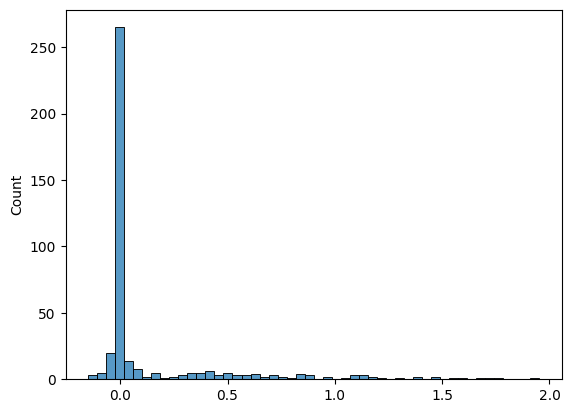

In [152]:
sns.histplot(Z.flatten(), bins=50)

# misc

In [7]:
data_60_list = []
for i in range(1, 6):
    B_true, W_est, W_est_1 = load_data(60, i, 'v35/v60_360')
    data_60_list.append((B_true, W_est, W_est_1))

data_80_list = []
for i in tqdm(range(1, 6)):
    B_true, W_est, W_est_1 = load_data(80, i, 'v35/v80_480')
    data_60_list.append((B_true, W_est, W_est_1))

In [25]:
n_nodes = 60
for data in data_60_list:
    print((data[-1][n_nodes:, :n_nodes] != 0.).sum())

0
0
0
0
1


In [103]:
data_80_list[0][0].sum()

320

In [26]:
n_nodes = 80
for data in data_80_list:
    print((data[-1][n_nodes:, :n_nodes] != 0.).sum())

1
1
1
1
1


In [87]:
n_nodes = 80
B_true = data_80_list[0][0]
for data in data_80_list:
    print((data[-1][:n_nodes, :n_nodes][~B_true] != 0.).sum())
    print(np.abs(data[-1][:n_nodes, :n_nodes][~B_true]).min())
    print(np.abs(data[-1][:n_nodes, :n_nodes][~B_true]).max())

12
0.0
0.8463404077323428
13
0.0
1.1275577136696644
10
0.0
0.9692053931683082
10
0.0
0.9041737949866557
13
0.0
1.033787713947818


In [101]:
n_nodes = 80
B_true = data_80_list[0][0]
for data in data_80_list:
    print((data[-1][:n_nodes, :n_nodes][~B_true] != 0.).sum())
    print((np.log(np.abs(data[-1][:n_nodes, :n_nodes][~B_true])+1e-8) < -1).sum())
    print(np.log(np.abs(data[-1][:n_nodes, :n_nodes][~B_true]).min()+1e-8))
    print(np.log(np.abs(data[-1][:n_nodes, :n_nodes][~B_true]).max()+1e-8))

12
6068
-18.420680743952367
-0.1668336152846479
13
6067
-18.420680743952367
0.12005398724356525
10
6070
-18.420680743952367
-0.03127871518086488
10
6070
-18.420680743952367
-0.10073367491657945
13
6067
-18.420680743952367
0.033229459021560645


In [97]:
(np.log(np.abs(data[-1][:n_nodes, :n_nodes][~B_true])+1e-8) > -10).sum()

13

In [85]:
n_nodes = 80
B_true = data_80_list[0][0]
for data in data_80_list:
    print((data[-1][:n_nodes, :n_nodes][B_true] != 0.).sum())

212
213
213
211
209


In [28]:
n_nodes = 60
for data in data_60_list:
    print((data[1][n_nodes:, :n_nodes] != 0.).sum())

3600
3600
3600
3600
3600


In [27]:
n_nodes = 80
for data in data_80_list:
    print((data[1][n_nodes:, :n_nodes] != 0.).sum())

6400
6400
6400
6400
6400


In [33]:
n_nodes = 60
Z_60 = [
    np.abs(data[1][:n_nodes, :n_nodes]) - np.abs(data[1][n_nodes:, :n_nodes])
    for data in data_60_list
]

Z_60_dag = [
    np.abs(data[-1][:n_nodes, :n_nodes]) - np.abs(data[-1][n_nodes:, :n_nodes])
    for data in data_60_list
]

n_nodes = 80
Z_80 = [
    np.abs(data[1][:n_nodes, :n_nodes]) - np.abs(data[1][n_nodes:, :n_nodes])
    for data in data_80_list
]

Z_80_dag = [
    np.abs(data[-1][:n_nodes, :n_nodes]) - np.abs(data[-1][n_nodes:, :n_nodes])
    for data in data_80_list
]



In [ ]:
target = Z_60
B_true = data_60_list[0][0]
print((target[0][~B_true] < 0.).sum() / target[0].size)
print((target[0][~B_true] > 0.).sum() / target[0].size)

In [63]:
target = Z_60
B_true = data_60_list[0][0]
print((target[0][~B_true] < 0.).sum() / target[0].size)
print((target[0][~B_true] > 0.).sum() / target[0].size)

0.41638888888888886
0.5169444444444444


In [64]:
target = Z_60_dag
B_true = data_60_list[0][0]
print((target[0][~B_true] < 0.).sum() / target[0].size)
print((target[0][~B_true] > 0.).sum() / target[0].size)

0.0
0.0


In [104]:
Z_80[3].size

6400

In [79]:
target = Z_80
B_true = data_80_list[0][0]
print("before DAG")
print(f"proportion of Z null < 0: {(target[3][~B_true] < 0.).sum() / target[3].size:.4f}")
print(f"proportion of Z null > 0: {(target[3][~B_true] > 0.).sum() / target[3].size:.4f}")

print(f"proportion of Z < 0: {(target[3] < 0.).sum() / target[3].size:.4f}")
print(f"proportion of Z > 0: {(target[3] > 0.).sum() / target[3].size:.4f}")

before DAG
proportion of Z null < 0: 0.4167
proportion of Z null > 0: 0.5333
proportion of Z < 0: 0.4177
proportion of Z > 0: 0.5823


In [80]:
target = Z_80_dag
B_true = data_80_list[0][0]
print("after DAG")
print(f"proportion of Z null < 0: {(target[3][~B_true] < 0.).sum() / target[3].size:.4f}")
print(f"proportion of Z null > 0: {(target[3][~B_true] > 0.).sum() / target[3].size:.4f}")

print(f"proportion of Z < 0: {(target[3] < 0.).sum() / target[3].size:.4f}")
print(f"proportion of Z > 0: {(target[3] > 0.).sum() / target[3].size:.4f}")

after DAG
proportion of Z null < 0: 0.0000
proportion of Z null > 0: 0.0016
proportion of Z < 0: 0.0002
proportion of Z > 0: 0.0345


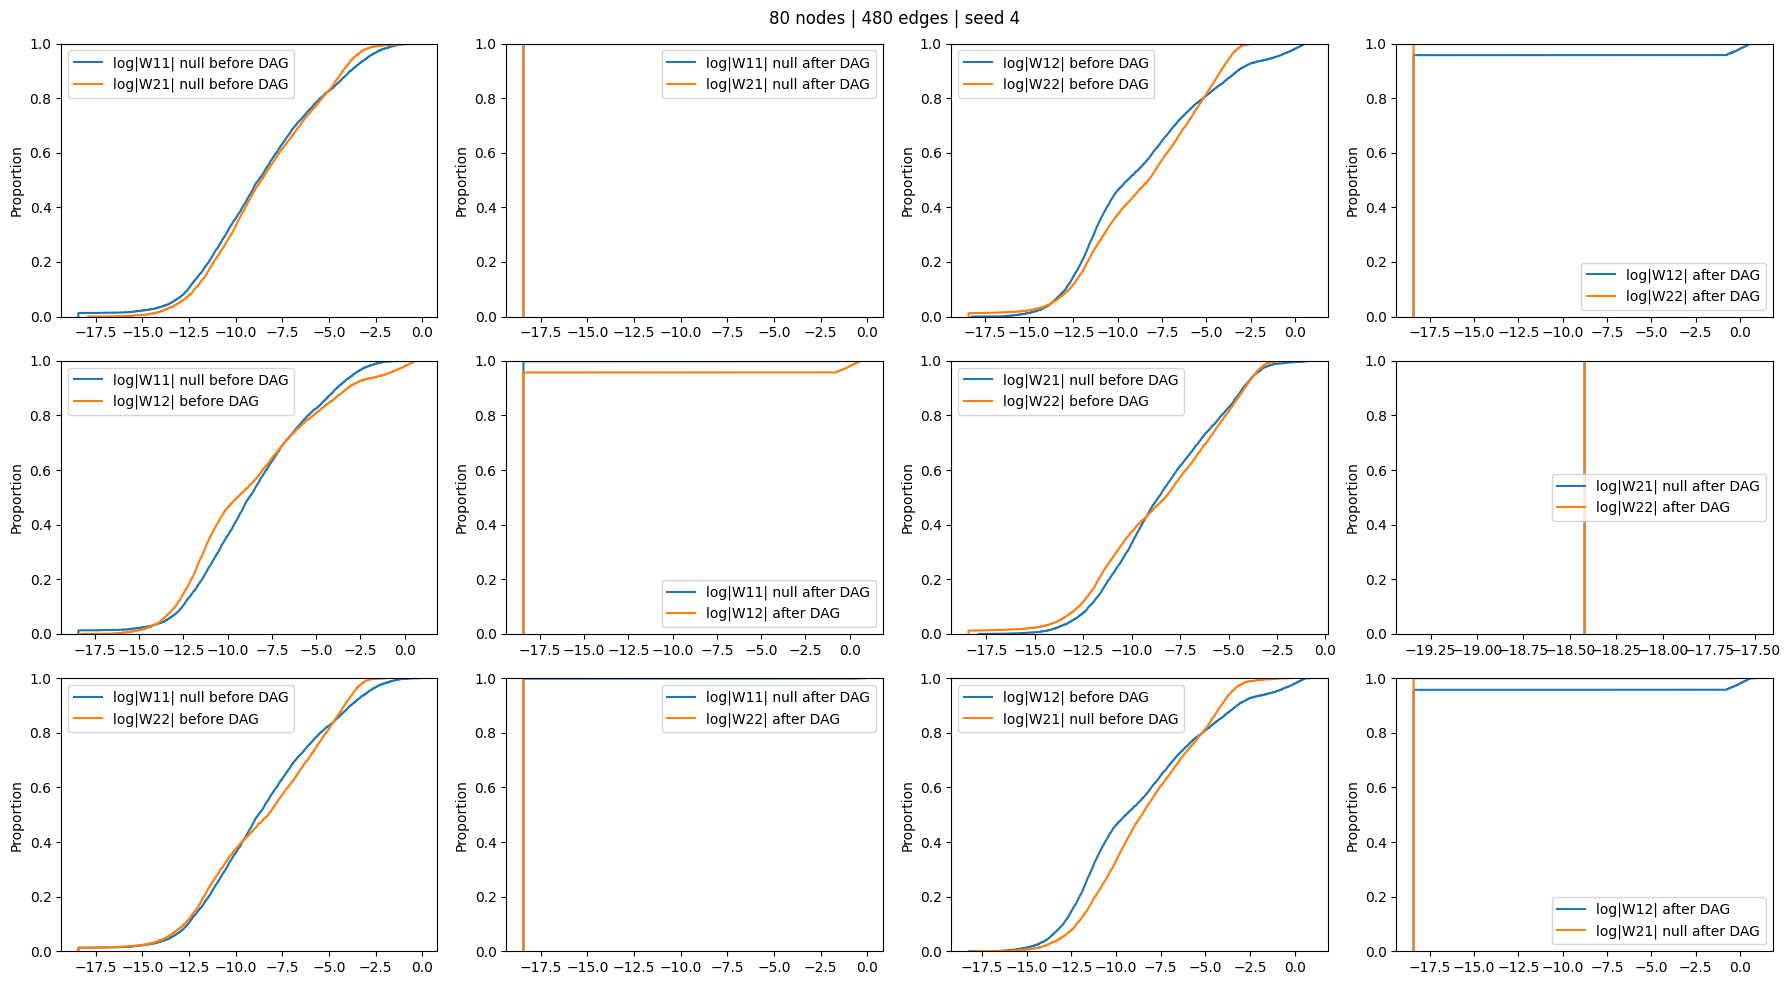

In [68]:
draw_results_3(80, 6, 4, 'v35/v80_480', data_80_list)

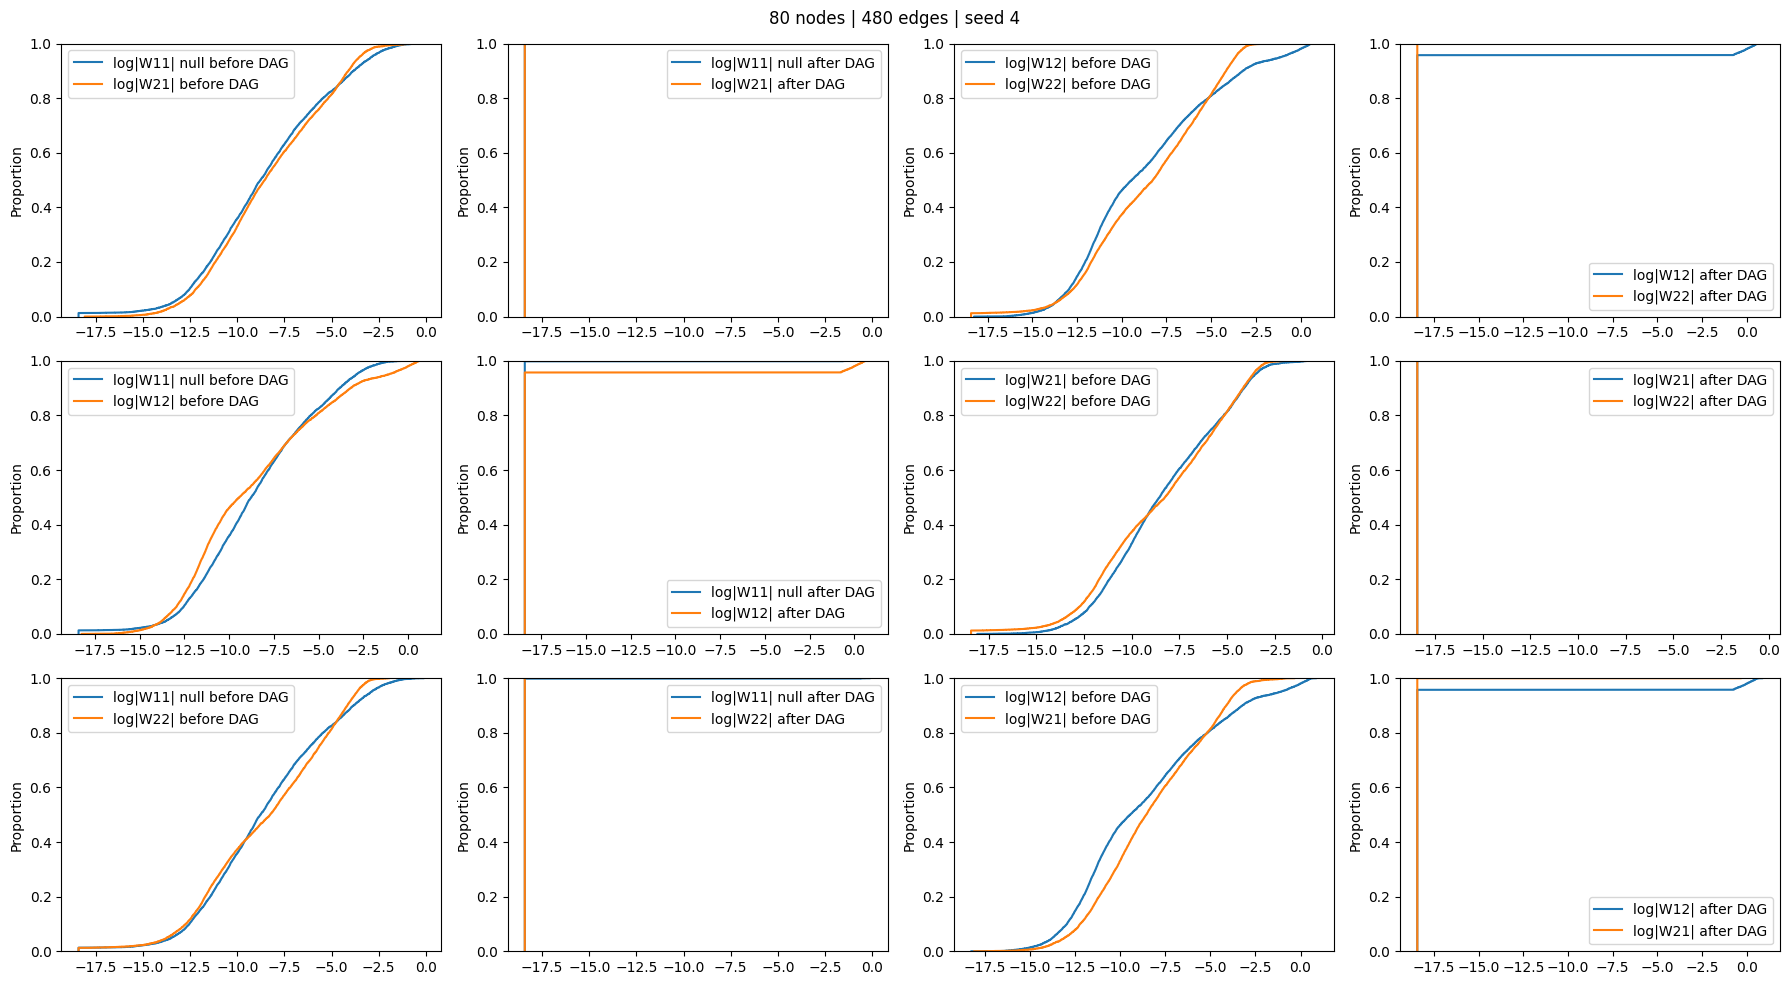

In [108]:
draw_results_3(80, 6, 4, 'v35/v80_480', data_80_list)

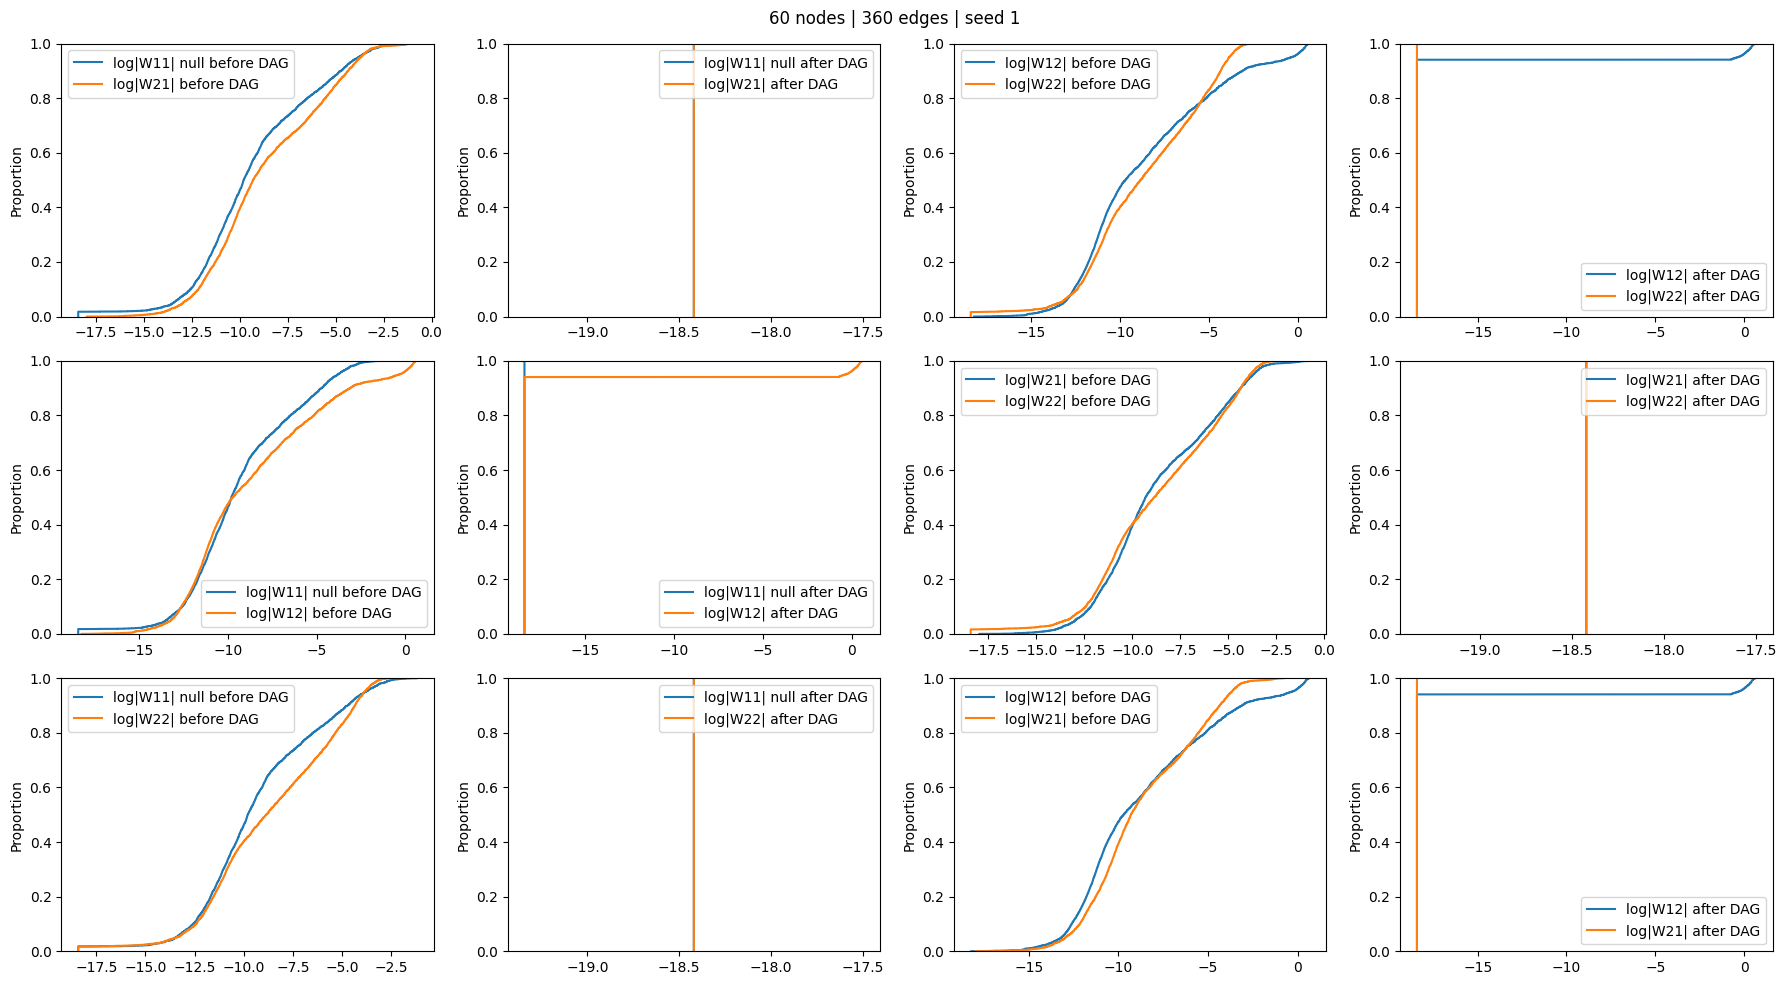

In [114]:
draw_results_3(60, 6, 1, 'v35/v60_360', data_60_list)

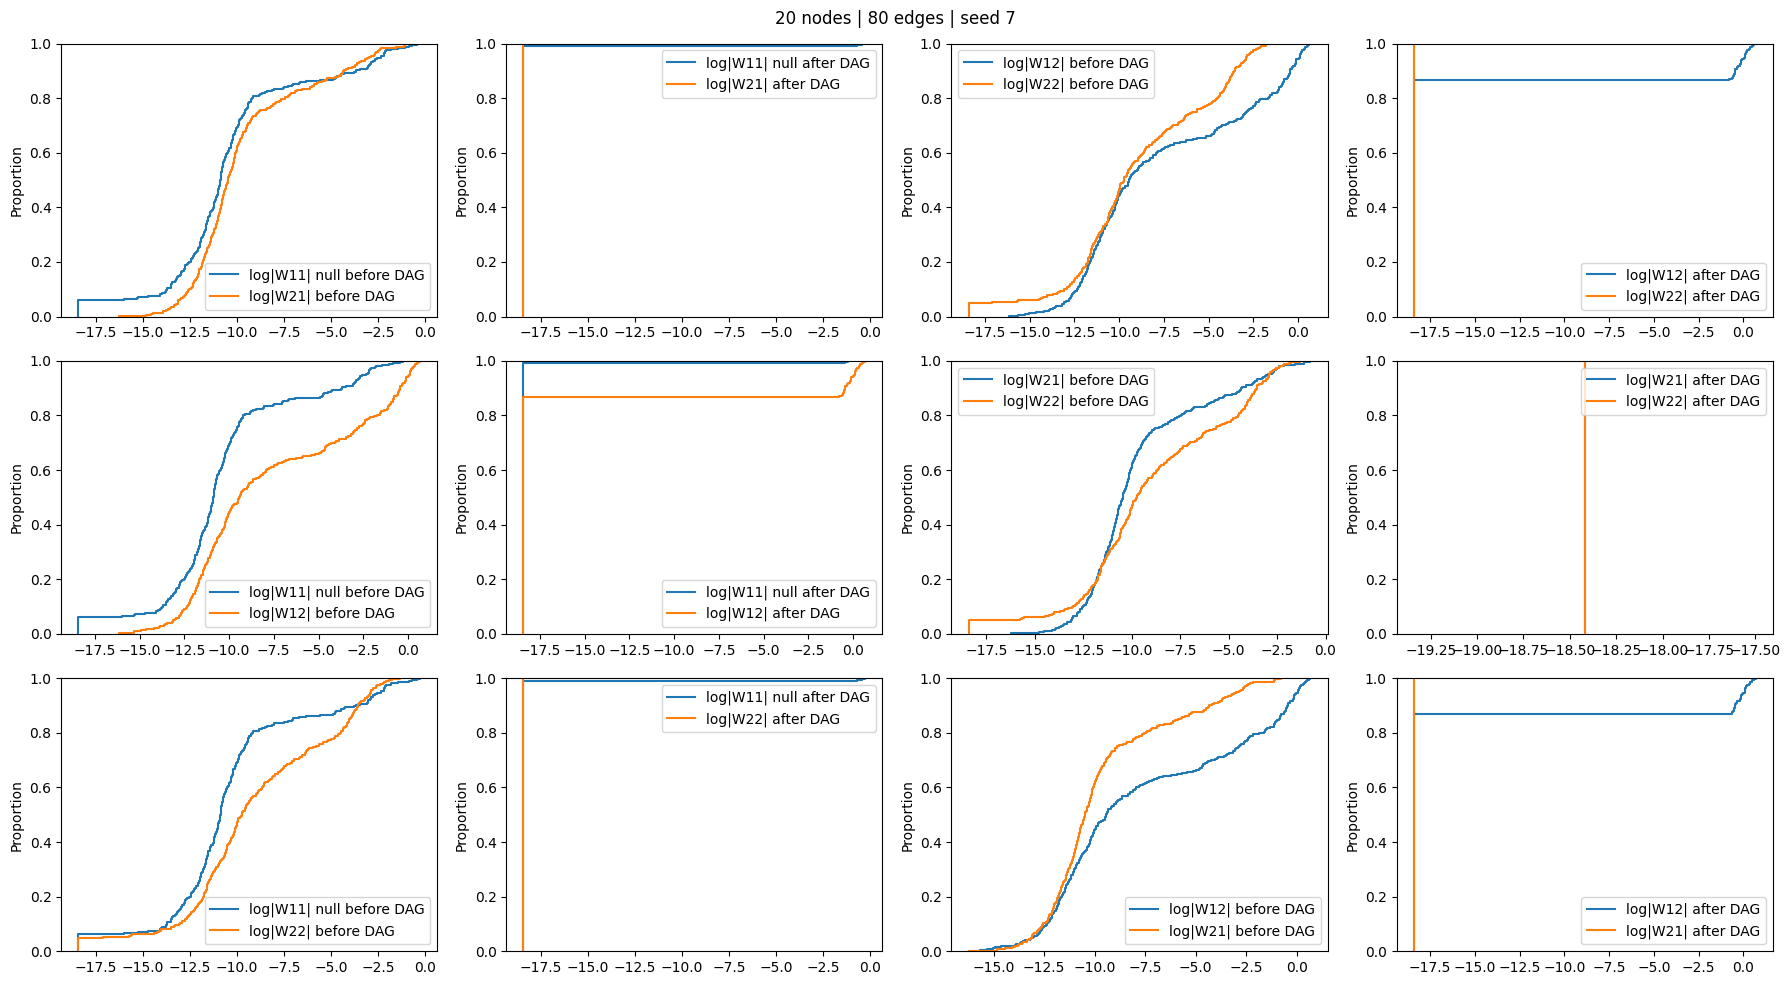

In [112]:
draw_results_3(20, 4, 7, 'v34/v20', None)

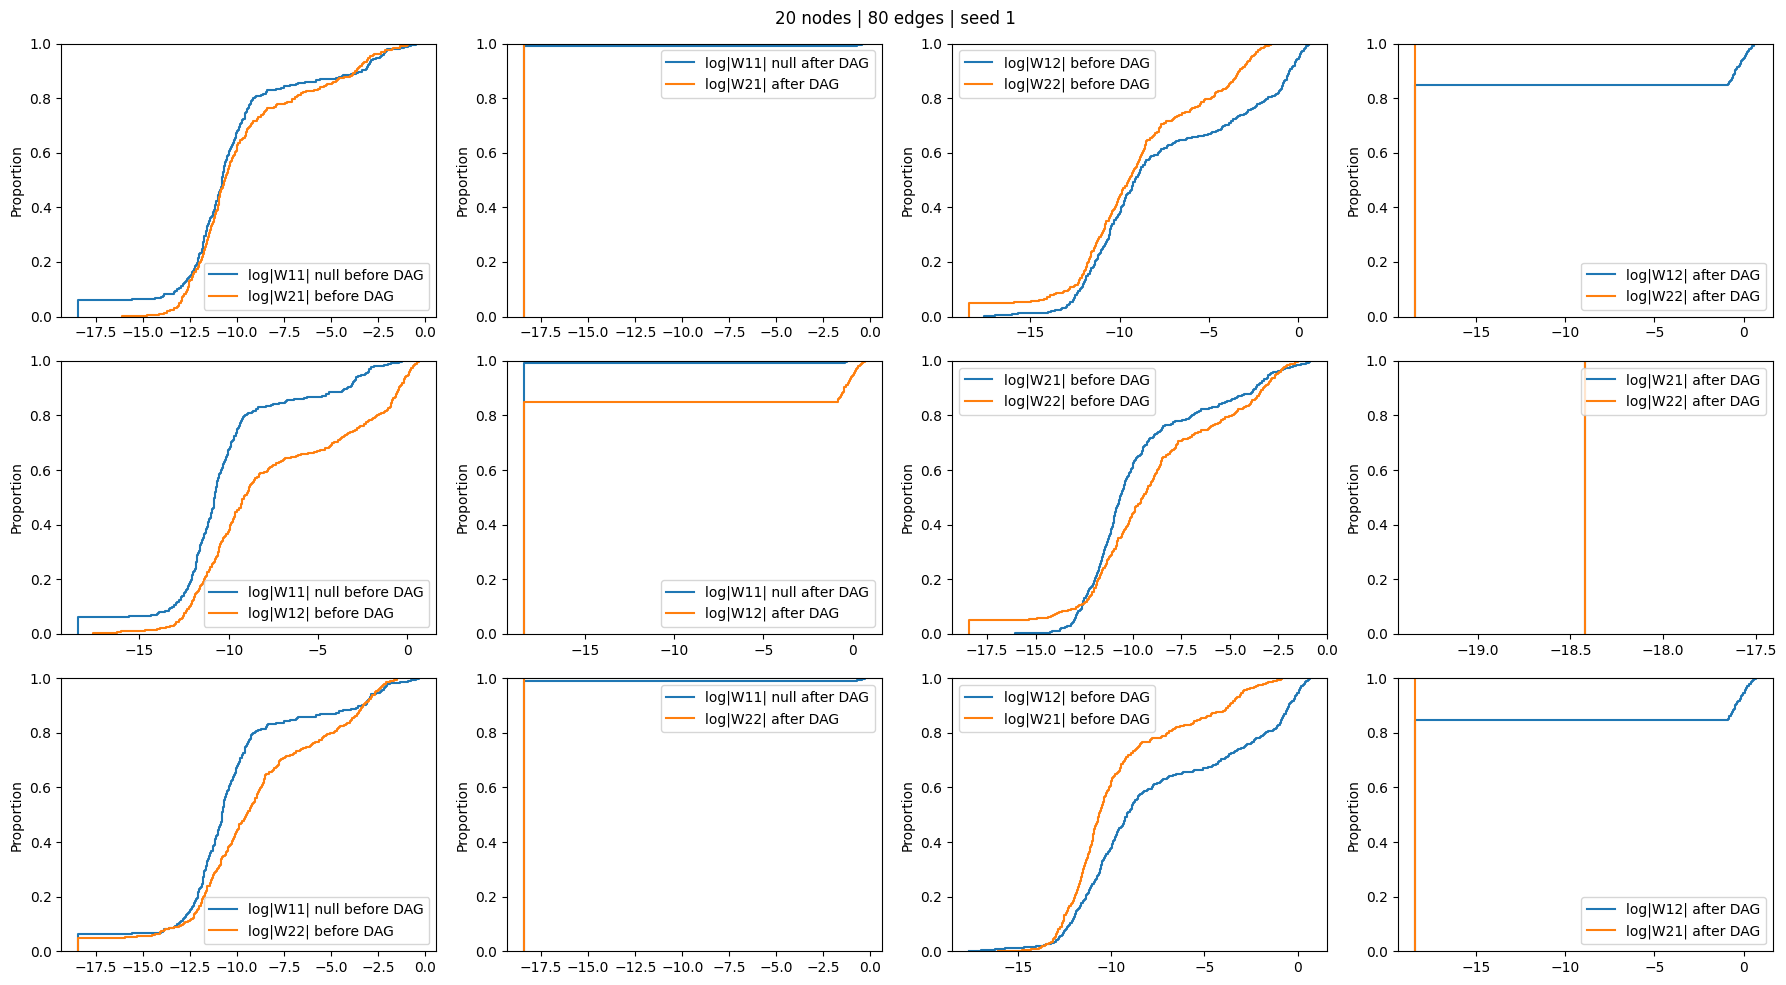

In [153]:
draw_results_3(20, 4, 1, 'v34/v20', None)